Wat is clustering?

Een clusteranalyse wordt uitgevoerd door op zoek te gaan naar de overeenkomsten tussen objecten binnen een dataset.
Je zoekt naar patronen of relaties tussen objecten binnen een dataset op basis van kenmerken van die objecten.
Nadat je eventuele verbanden tussen de objecten hebt gevonden, ga je de objecten indelen in verschillende groepen.
Zo kun je bijvoorbeeld e-mails indelen op basis van verbanden die worden gevonden in de tekst, de lengte van het bericht of het moment van verzenden.
Je weet van tevoren niet onder welke categorieën de e-mails kunnen vallen. Belangrijk om te onthouden is dat deze groepen echt zijn gebaseerd op de kenmerken van de objecten van de dataset.
Je kunt deze groepen dus niet bepalen zonder de dataset eerst uitgebreid te hebben geanalyseerd en te hebben beoordeeld op kwaliteit.

Wanneer wordt het gebruikt?

Een clusteranalyse wordt gebruikt om te analyseren of er clusters (groepen) in je data aanwezig zijn. Zo kun je een clusteranalyse toepassen om bijvoorbeeld te ontdekken of er verschillende marketingsegmenten aanwezig zijn binnen jouw klantenbase. Je kunt een clusteranalyse tevens gebruiken om te onderzoeken of bepaalde producten dezelfde kenmerken hebben.

Leg je algoritme uit DBSCAN:

Wat doet het?
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

Hoe werkt het?

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

Wat zijn de voor-en nadelen?

tip (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)


Welke parameters kun je veranderenen wat betekenen deze?

Parameters:

The DBSCAN algorithm basically requires 2 parameters:

    eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.

    minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

Parameter estimation:

The parameter estimation is a problem for every data mining task. To choose good parameters we need to understand how they are used and have at least a basic previous knowledge about the data set that will be used.

    eps: if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable.

    minPoints: As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as minPoints ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. The minimum value for the minPoints must be 3, but the larger the data set, the larger the minPoints value that should be chosen.

Nu ga je het cluster algoritme toepassen: Begin met de makkelijkere dataset iris.

Laad de dataset Iris in met de volgende comando’s: from sklearn import datasets iris =datasets.load_iris()

In [156]:
from sklearn import datasets
# 2 en 3 zijn 'petal length (cm)', 'petal width (cm)' in de feature_names array
iris = datasets.load_iris()

Selecteer alleen de petal lengthen petal witdhen de Species.

In [157]:
X, Y = iris.data[:, [2,3]], iris.target

print("Features : ", iris.feature_names)
print("Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape)


Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 2) (150,)


In [95]:
# from sklearn.datasets import load_iris
# import pandas as pd
#
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Geef de petal lengthvs de petal width weer in een scatterplot en geef per species een andere kleur. Zie je al duidelijke clusters?

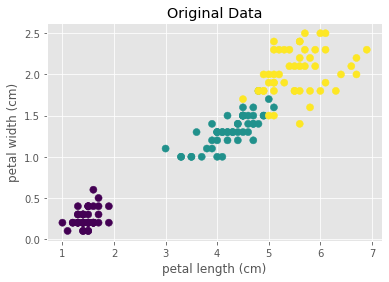

In [158]:
import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.title("Original Data")


Visualiseer de clusters met een kleur en de werkelijke clusters met een ander symbool.

In [159]:
def plot_actual_prediction_iris(X, Y, Y_preds):
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))

        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris.feature_names[2])
        plt.ylabel(iris.feature_names[3])
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="o", s=50)
        plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="o", s=50)
        plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="o", s=50)
        plt.xlabel(iris.feature_names[2])
        plt.ylabel(iris.feature_names[3])
        plt.title("Clustering Algorithm Prediction");



Pas nu het cluster algoritme toe op de variabelen petal length, petal width

Adjusted Rand Score:  0.5681159420289855
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]
Size of Components:  (148, 2)
Size of Core Samples:  (148,)


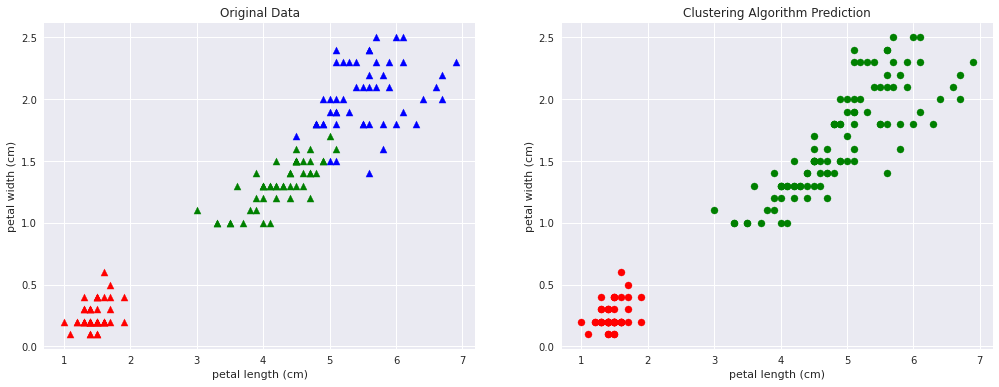

In [192]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix

db = DBSCAN()
Y_preds = db.fit_predict(X)
Y_preds
plot_actual_prediction_iris(X, Y, Y_preds)
print("Adjusted Rand Score: ", adjusted_rand_score(Y, Y_preds))
print(confusion_matrix(Y, Y_preds))
print("Size of Components: ", db.components_.shape)
print("Size of Core Samples: ", db.core_sample_indices_.shape)

Vergelijk de voorspellende clusters met de werkelijke clusters(Species)in een confusion matrix.

Wat valt op als naar de visualisatie en tabel wordt gekeken?•Wat doet verandering van parameters met de clusters?

Creëer een model waarin te veel en te weinig clusterszichtbaar zijn.

Adjusted Rand Score:  0.69478148725419
[[ 0  0  0  0]
 [ 0 50  0  0]
 [10  0 37  3]
 [37  0  1 12]]
Size of Components:  (75, 2)
Size of Core Samples:  (75,)


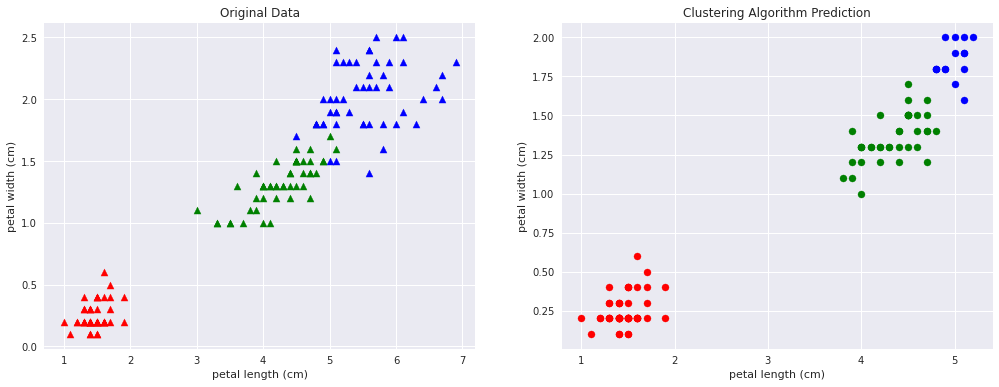

In [193]:
db = DBSCAN(eps=0.2, min_samples=8,)
Y_preds = db.fit_predict(X)
Y_preds
plot_actual_prediction_iris(X, Y, Y_preds)
print("Adjusted Rand Score: ", adjusted_rand_score(Y, Y_preds))
print(confusion_matrix(Y, Y_preds))
print("Size of Components: ", db.components_.shape)
print("Size of Core Samples: ", db.core_sample_indices_.shape)

Adjusted Rand Score:  0.13754986145739959
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 6 19 10  3  7  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [14  0  0  0  0  0  0  3  6  2  5  6  2  2  2  2  1  4  1  0  0  0  0  0
   0  0  0]
 [24  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  2  0  1  2  4  3  3  3
   2  2  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  

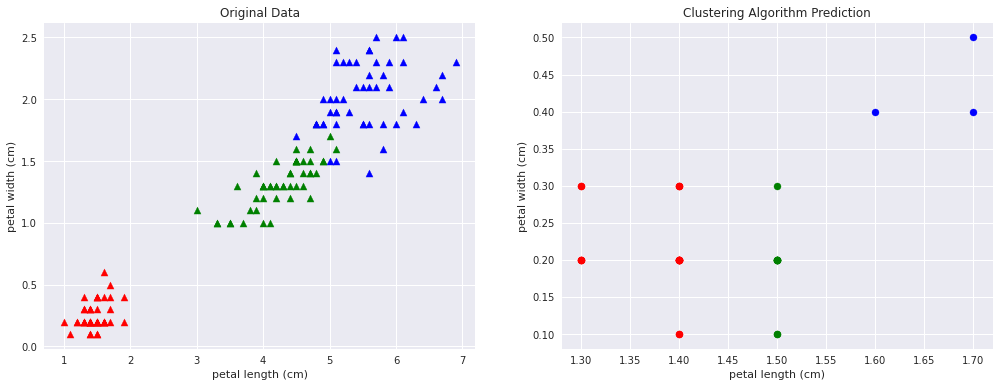

In [194]:
db = DBSCAN(eps=0.1, min_samples=2,)
Y_preds = db.fit_predict(X)
Y_preds
plot_actual_prediction_iris(X, Y, Y_preds)
print("Adjusted Rand Score: ", adjusted_rand_score(Y, Y_preds))
print(confusion_matrix(Y, Y_preds))
print("Size of Components: ", db.components_.shape)
print("Size of Core Samples: ", db.core_sample_indices_.shape)